In [6]:
from skimage import io, color
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from skimage.color import label2rgb
import pydicom as dicom
from scipy.stats import norm
from scipy.spatial import distance


def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray", vmin=-200, vmax=500)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

In [15]:
in_dir = "data/dicom/"
ct = dicom.read_file(in_dir + '1-162.dcm')
img = ct.pixel_array

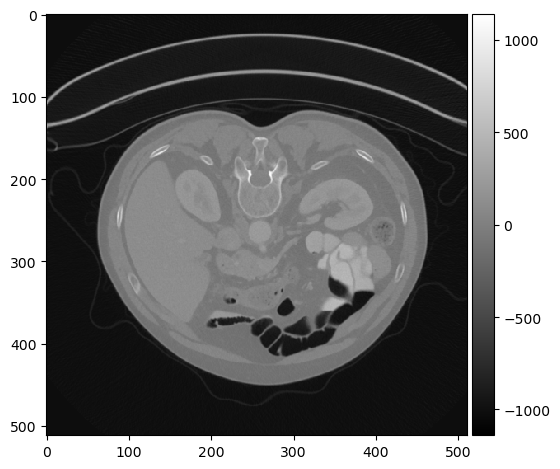

In [10]:
io.imshow(img, cmap='gray')
io.show()

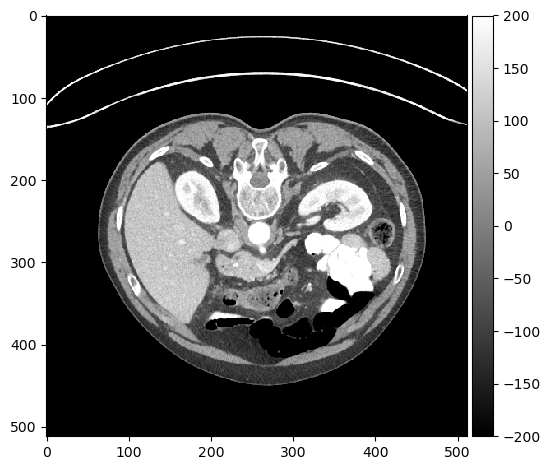

In [11]:
minimum = np.min(img)
maximum = np.max(img)
io.imshow(img, vmin=-200, vmax=200, cmap='gray')
io.show()

In [14]:
liver_roi = io.imread(in_dir + 'LiverROI.png')
kidney_roi = io.imread(in_dir + 'KidneyROI.png')
aorta_roi = io.imread(in_dir + 'AortaROI.png')
# convert to boolean image

liver_mask = liver_roi > 0
liver_values = img[liver_mask]
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]
aorta_mask = aorta_roi > 0
aorta_values = img[aorta_mask]

In [ ]:
t_background = -200
t_fat_soft = (mu_fat+mu_kidney)/2
t_soft_bone = (mu_spleen+mu_bone)/2
#t_soft_bone = 300

background_img = (img < t_background)
fat_img = (img > t_background) & (img <= t_fat_soft)
soft_img = (img > t_fat_soft) & (img <= t_soft_bone)
bone_img = (img > t_soft_bone)